## Business Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman. Pemberi pinjaman biasanya membuat dua jenis keputusan:
1. Apakah akan memberikan kredit kepada pemohon baru
2. Bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka.

Dalam kedua kasus tersebut, apapun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dengan pemberi kerja saat ini, dll.) dan riwayat mereka selanjutnya. Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.

Objectives : Prediktive pengajuan nasabah kartu kredit yang baru akan gagal bayar atau tidak
#### Predictive Analytic untuk Meminimalisir Angka Risiko Nasabah Baru yang Berpotensi Gagal Bayar pada Pengejuan Kartu Kredit menggunakan Pendekatan Sains Data
Case : Klasifikasi --> Supervised Learning
Kemungkinan Algoritma yang Akan digunakan:
1. Decission Tree
2. Random Forest
3. Logistic Regression
4. SVM (Support Vector Machine)
5. XG-BOOST Classifier

## Data Understanding

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('credit_risk_1.csv')
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


# Data Description


Data Description There are 9 attributes containing 850 customer records followed by:


age: Umur nasabah


ed : Level pendidikan nasabah


employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun)


address : Jumlah tahun di alamat yang sama


income : Pendapatan nasabah


debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan) Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan Anda dibagi dengan pendapatan kotor bulanan Anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan Anda untuk mengelola pembayaran bulanan untuk melunasi uang yang Anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan Anda tidak secara langsung mempengaruhi nilai kredit Anda. Ini karena lembaga kredit tidak tahu berapa banyak uang yang Anda peroleh, sehingga mereka tidak dapat melakukan penghitungan


creddebt : Credit to debt ratio (Rasio kredit terhadap utang) Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio Anda pada salah satu kartu Anda secara terpisah serta untuk rasio keseluruhan Anda.


othdebt : utang lainnya


default : Label pelanggan gagal di masa lalu (1 = gagal , 0 = tidak pernah gagal)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


Tipe data semuanya numerik, tetapi casenya adalah case klasifikasi, sehingga pada tahap pemodelan data Variable dependen/variabel target harus diubah ke dalam bentuk kategori

Syarat KLASIFIKASI:
1. Variabel target/dependen --> kategorik
2. Input variabel bisa kategorik bisa numerik

VARIABEL TARGET/DEPENDEN : default

input variabel :
1. age
2. ed
3. employ
4. address
5. income
6. debtinc
7. creddebt
8. othdebt

1= gagal bayar, 0= tidak gagal bayar

In [57]:
df.isnull().sum()

Unnamed: 0    0
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default       0
dtype: int64

In [58]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [59]:
df['ed'].value_counts()

ed
1    372
2    198
3     87
4     38
5      5
Name: count, dtype: int64

In [60]:
df= df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']]

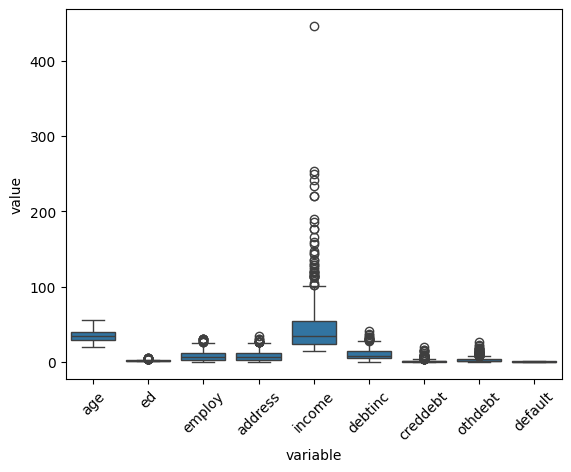

In [61]:
# Analisis Outlier 
sns.boxplot(x='variable', y='value', data=pd.melt(df))
plt.xticks(rotation=45)
plt.show()

In [62]:
df_a=df[['age', 'ed', 'employ', 'address', 'debtinc', 'creddebt', 'othdebt']]

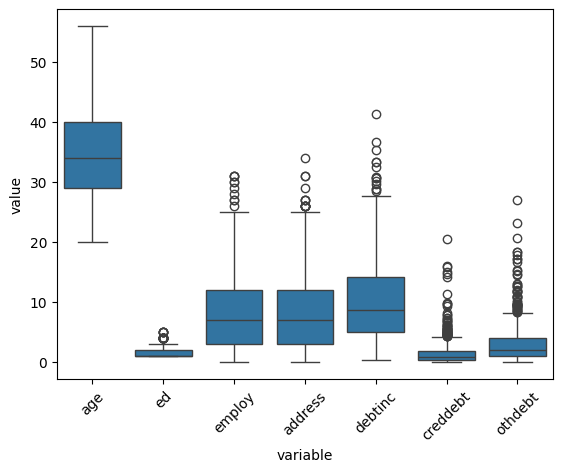

In [63]:
sns.boxplot(x='variable', y='value', data=pd.melt(df_a))
plt.xticks(rotation=45)
plt.show()

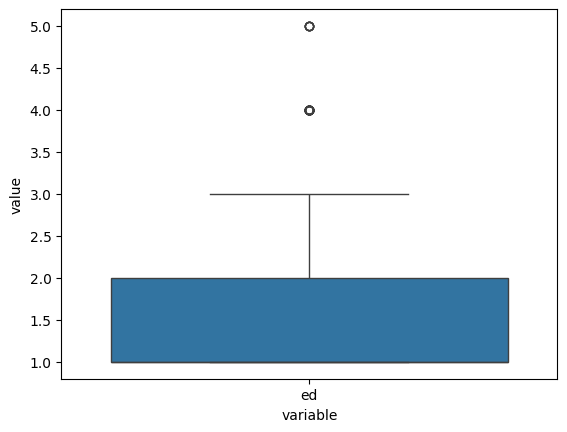

In [64]:
df_b=df[['ed']]
sns.boxplot(x='variable', y='value', data=pd.melt(df_b))
plt.show()

1. Calon nasabah kredit di dominasi usia di atas 20 Tahun
2. Tingkat pendidikan calon nasabah ada 5 (SD/SMP/SMA/S1/S2) didominasi tingkat 1 dan 2 berdasarkan pada area boxplot (seberapa banyaknya), sedangkan ED 3--> lebih sedikit. Makin sedikit level pendidikan maka semakin besar peluang pengajuan kreditnya
3. Seseorang percaya diri mengajukan kredit jika sudah 2 tahun tinggal ditempat yang sama dan jabatan yang sama, rasio debit dalam 2 tahun (nilainya sama)
4. Ada banyak nasabah kredit memiliki hutang lainnya

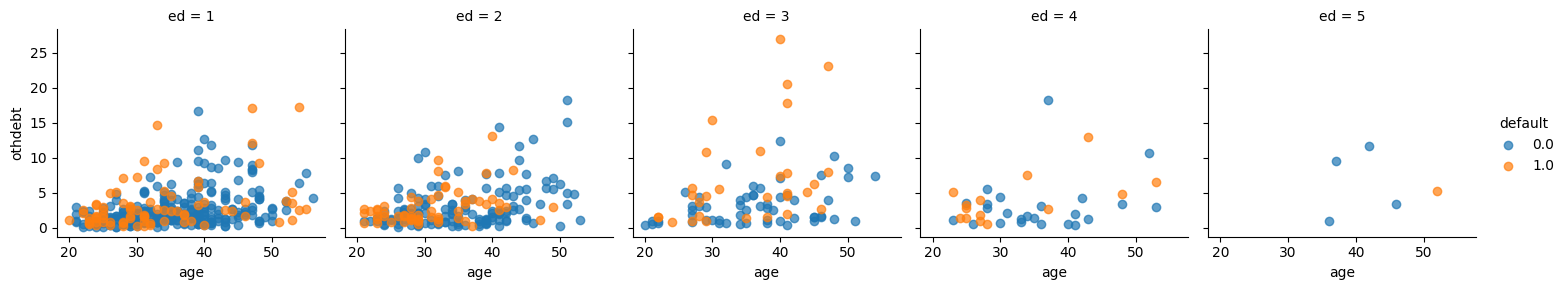

In [65]:
scatplot =sns.FacetGrid(df, col='ed', hue='default')
scatplot.map(plt.scatter, 'age', 'othdebt', alpha=.7)
scatplot.add_legend()

1. potensi gagal bayar didominasi pada range usia 20 sd 30 pada level ED 1
2. potensi gagal bayar didominasi pada range usia 20 sd 35 pada level ED 2
3. potensi gagal bayar didominasi pada range usia 20 sd 45 pada level ED 3
4. potensi gagal bayar didominasi pada range usia 20 sd 28 pada level ED 4
5. potensi gagal bayar didominasi pada range usia diatas 50 pada level ED 5

## Data Preparation

In [66]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [67]:
df.isna().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

## Pemodelan Data

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [70]:
x = df[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']] # Input Variabel
y = df['default'].astype('category') # Target variabel

In [71]:
# SPLIT testing & training data
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)

### Pemodelan menggunakan Decission Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
# membuat object algoritma decision tree
tree =DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6)

# memodelkan data menggunakan algoritma decisiontree
model_tree =tree.fit(x_train, y_train)

# melakukan predict pada data test
pred_tree =model_tree.predict(x_test)

In [74]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       155
         1.0       0.49      0.53      0.51        55

    accuracy                           0.73       210
   macro avg       0.66      0.67      0.66       210
weighted avg       0.74      0.73      0.74       210



Text(113.9222222222222, 0.5, 'predicted  label')

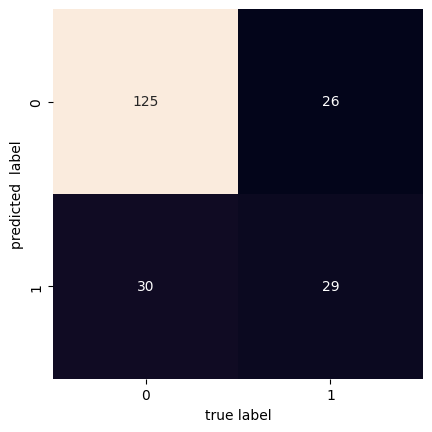

In [75]:
# Visualize the confusion matrix of Decision Tree
mat = confusion_matrix (y_test, pred_tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

<Axes: >

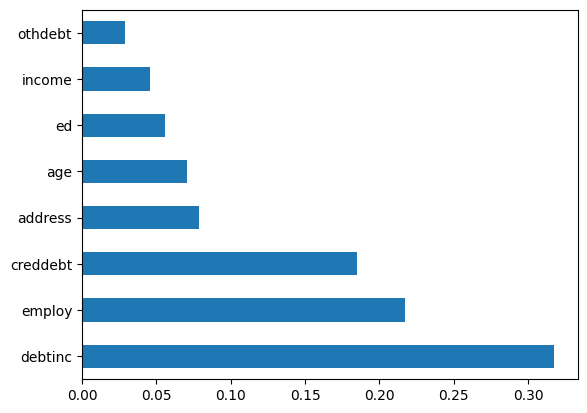

In [76]:
# signifikan faktor dari model tersebut yang menggambarkan nasabah gagal bayar/tidak
feat_importances=pd.Series(model_tree.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Pemodelan menggunakan random forrest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [78]:
# Membuat object algoritma random forest klasifikasi
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=6)

# memodelkan data menggunakan algoritma random forest
model_rf = clf_rf.fit(x_train, y_train)

# melakukan predict pada data test
pred_rf =model_rf.predict(x_test)

In [79]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       155
         1.0       0.69      0.36      0.48        55

    accuracy                           0.79       210
   macro avg       0.75      0.65      0.67       210
weighted avg       0.78      0.79      0.77       210



Text(113.9222222222222, 0.5, 'predicted  label')

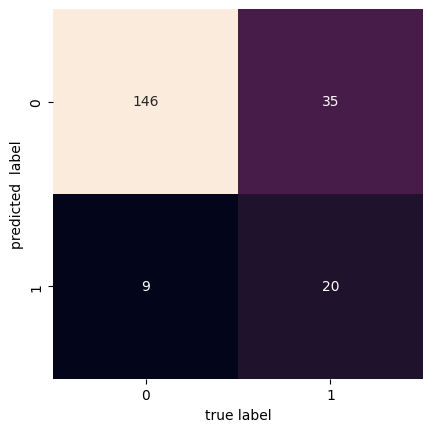

In [80]:
# Visualize the confusion matrix of Random forest
mat = confusion_matrix (y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

<Axes: >

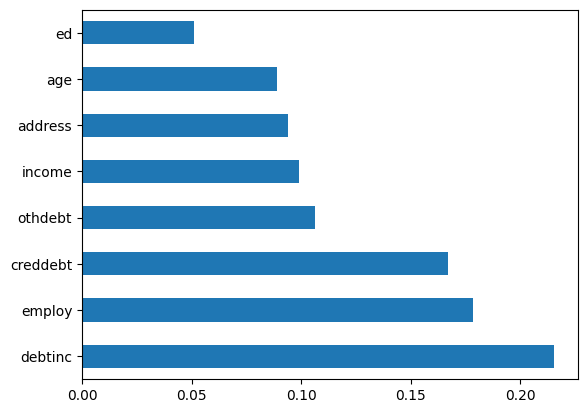

In [81]:
feat_importances=pd.Series(model_rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Pemodelan Menggunakan XG-BOOST Classifier

In [82]:
from xgboost import XGBClassifier

In [83]:
# Membuat object algoritma random forest klasifikasi
clf_xg = XGBClassifier()

# memodelkan data menggunakan algoritma random forest
model_xg = clf_xg.fit(x_train, y_train)

# melakukan predict pada data test
pred_xg =model_xg.predict(x_test)

In [84]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       155
         1.0       0.57      0.44      0.49        55

    accuracy                           0.77       210
   macro avg       0.69      0.66      0.67       210
weighted avg       0.75      0.77      0.76       210



Text(113.9222222222222, 0.5, 'predicted  label')

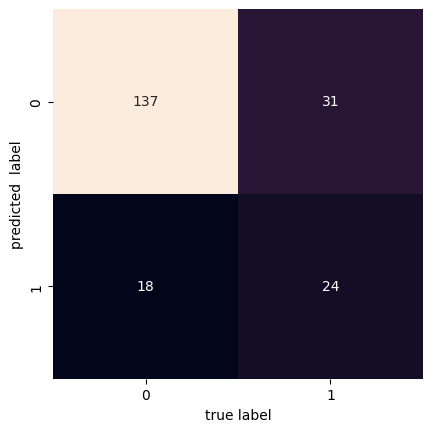

In [85]:
# Visualize the confusion matrix of Random forest
mat = confusion_matrix (y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

<Axes: >

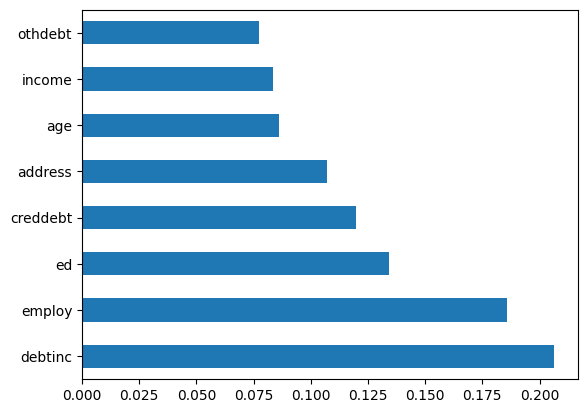

In [86]:
feat_importances=pd.Series(model_xg.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Pemodelan menggunakan Logistik Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
# Membuat object algoritma random forest klasifikasi
clf_lr =LogisticRegression()

# memodelkan data menggunakan algoritma random forest
model_lr = clf_lr.fit(x_train, y_train)

# melakukan predict pada data test
pred_lr =model_lr.predict(x_test)

In [89]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       155
         1.0       0.73      0.40      0.52        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.70       210
weighted avg       0.79      0.80      0.78       210



Text(113.9222222222222, 0.5, 'predicted  label')

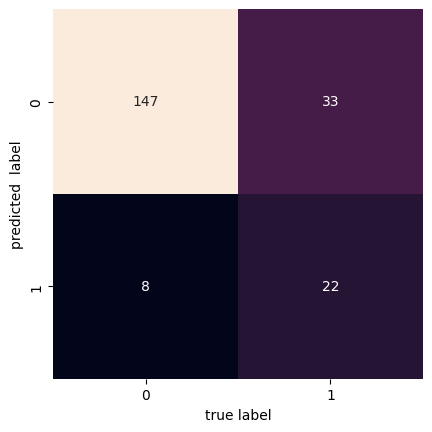

In [90]:
# Visualize the confusion matrix of Logistik Regression
mat = confusion_matrix (y_test, pred_lr)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

### Pemodelan menggunakan SVM

In [91]:
from sklearn.svm import SVC

In [92]:
# Membuat object algoritma random forest klasifikasi
clf_svm =SVC(kernel='linear', random_state=0)

# memodelkan data menggunakan algoritma random forest
model_svm = clf_svm.fit(x_train, y_train)

# melakukan predict pada data test
pred_svm =model_svm.predict(x_test)

In [93]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       155
         1.0       0.73      0.44      0.55        55

    accuracy                           0.81       210
   macro avg       0.78      0.69      0.71       210
weighted avg       0.80      0.81      0.79       210



Text(113.9222222222222, 0.5, 'predicted  label')

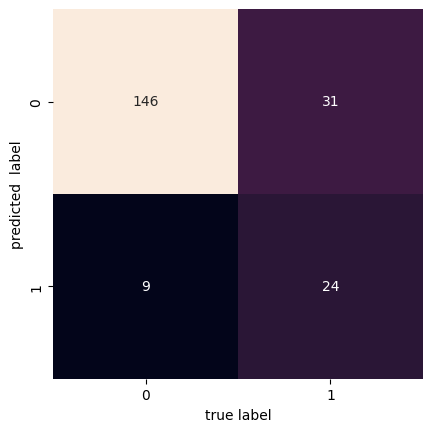

In [94]:
# Visualize the confusion matrix of SVM
mat = confusion_matrix (y_test, pred_svm)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted  label')

# Implementasi Model

Model terbaik menggunakan SVM dengan akurasi 81% dan presisi 82%

In [95]:
# Load data nasabah baru/calon nasabah yang mengajukan kredit 
df_newNasabah =pd.read_csv('credit_risk_newCust.csv')
df_newNasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [96]:
df_newNasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [97]:
# Input Variabel untuk predict
x2 = df_newNasabah[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

In [98]:
# Predict menggunakan model svm
prediction_svm = model_svm.predict(x2)

In [99]:
prediction_svm

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
## Membuat object baru untuk preparing hasil pemodelan data menggunakan data baru
df_pred= pd.DataFrame({'prediction':prediction_svm})
df_pred

,prediction
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
145,0.0
146,0.0
147,0.0
148,0.0


In [101]:
df_pred_newNasabah = pd.concat([x2, df_pred],sort=True, axis=1)
df_pred_newNasabah.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,prediction
0,36,1,16,13,32,10.9,0.544128,2.943872,0.0
1,50,1,6,27,21,12.9,1.316574,1.392426,0.0
2,40,1,9,9,33,17.0,4.880700,0.729300,1.0
3,31,1,5,7,23,2.0,0.046000,0.414000,0.0
4,29,1,4,0,24,7.8,0.866736,1.005264,0.0


In [102]:
df_pred_newNasabah['prediction'].value_counts()

prediction
0.0    127
1.0     23
Name: count, dtype: int64

Dari hasil tersebut maka bank akan memutuskan ada sebanyak 127 calon nasabah yang direrima permohonan kreditnya dan ada 23 nasabah yang ditolak permohonan kreditnya

In [103]:
df_pred_newNasabah.to_csv(path_or_buf='./predict_newNasabah.csv', index= False)